In [1]:
#Import everything
import Main.test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Helpers.regression_helpers import *

# Baseline Visualization

In [2]:
baselines_cross = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineData.csv")
baselines = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineDataOnSample.csv")
baselines.sample(5)

,csv_file,split,KNN,A_Classification_Score,B_Classification_Score
29,ComputerHardware,turn,47,0.514171,0.514171
500,Parkinsons,even,2,0.917877,0.911223
125,EnergyEfficiency,distort,82,0.875128,0.873910
304,AutoMPG,turn,34,0.837982,0.837982
639,ConcreteCompressiveStrength,skewed,191,0.228629,0.569145


In [3]:
baselines_grouped = baselines.groupby(by = ["csv_file", "split"]).max().drop(columns = ["KNN"]).reset_index()
baselines_grouped[baselines_grouped["csv_file"] == "Hydrodynamics"]

,csv_file,split,A_Classification_Score,B_Classification_Score
45,Hydrodynamics,distort,0.944973,0.895982
46,Hydrodynamics,even,0.000619,0.988501
47,Hydrodynamics,random,-0.002573,0.940687
48,Hydrodynamics,skewed,-0.000754,0.983942
49,Hydrodynamics,turn,0.944973,0.944830


<Axes: xlabel='csv_file'>

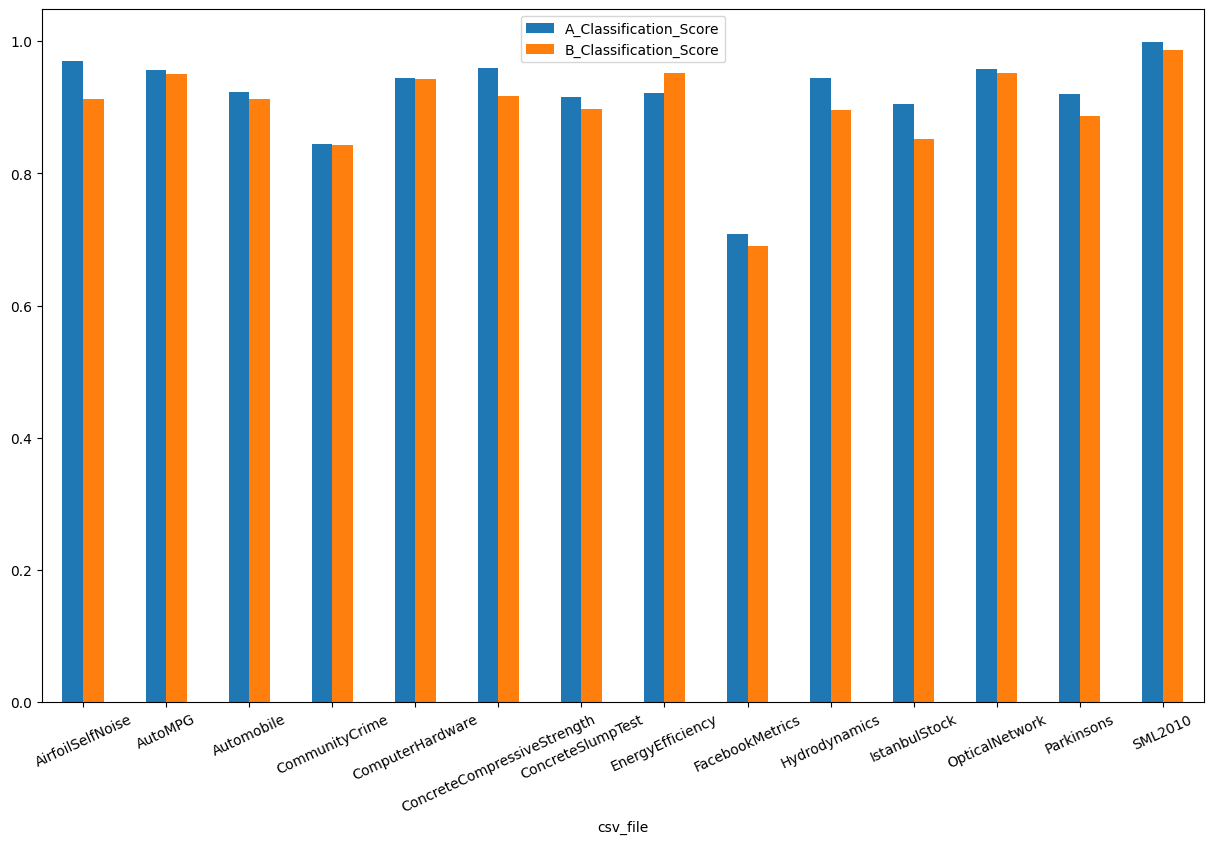

In [4]:
baselines_grouped[baselines_grouped["split"] == "distort"].set_index("csv_file").plot(kind = "bar", subplots=False, figsize=(15,9), rot= 25)
#Keep in mind that these are trained on one domain, then tested on the other. 

# Model Comparison

In [5]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData")
reg_df.sample(5)


,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD
102,RF-SPUD,Hydrodynamics,even,0.3,"{'knn': 2, 'OD_method': 'default', 'agg_method...",{'42': -0.07328351550397283},{'42': 0.00010541406645302748},{'42': -0.17527034836322364},{'42': -0.43306516623424995},{'42': -0.1821770328727701},{'42': 0.8742153910253255},{'42': 0.9625208794184383},"{'42': {'RF-OOB': -0.20439198609912723, 'KNN':...",{}
305,DTA,ConcreteSlumpTest,even,0.3,"{'knn': 5, 'distances': 'DPT'}",{'42': 0.2698415771806205},{'42': 0.27921307026965914},{'42': 0.2110288716470613},{'42': 0.44135567817736965},{'42': 0.4002739668279923},{'42': 0.6627650231080192},{'42': 0.6396624020537428},"{'42': {'RF-OOB': 0.29566713499460107, 'KNN': ...",{}
204,DTA,AutoMPG,distort,0.3,"{'knn': 50, 'distances': 'DPT'}","{'42': 0.9106931986240429, '1738': 0.899425335...","{'42': 0.013505428804119174, '1738': 0.0117492...","{'42': 0.8873468084464393, '1738': 0.494963099...","{'42': 0.875121537127763, '1738': 0.5224569747...","{'42': 0.8531041488987251, '1738': 0.613089014...","{'42': 0.34945139925202073, '1738': 0.67217899...","{'42': 0.3222001891605252, '1738': 0.746767929...","{'42': {'RF-OOB': 0.9155614209858868, 'KNN': 0...",{}
66,NAMA,ComputerHardware,even,0.3,"{'OD_method': 'mean', 'agg_method': 'log'}",{'42': -0.1283197828346374},{'42': 0.0021290721366269087},{'42': 0.5967891940400942},{'42': 0.7430509126576748},{'42': 0.5696206942247775},{'42': 0.9203325339871347},{'42': 0.7111195593923577},"{'42': {'RF-OOB': 0.5409246090422826, 'KNN': 0...","{'OD_method': 0.008143263274475343, 'agg_metho..."
385,RF-SPUD,ConcreteCompressiveStrength,distort,0.3,"{'knn': 23, 'OD_method': 'default', 'agg_metho...","{'42': -0.11491544340560322, '1738': -0.259091...","{'42': 0.0, '1738': 0.0, '5271': 0.0, '9209': ...","{'42': 0.015151717088565109, '1738': 0.0019689...","{'42': -0.004565634902983451, '1738': 0.023258...","{'42': 0.046533904143755134, '1738': 0.0523767...","{'42': 0.938263014404372, '1738': 0.9622691070...","{'42': 0.9630772599005522, '1738': 0.976941497...","{'42': {'RF-OOB': -0.009542530472294475, 'KNN'...",{}


In [6]:
proc_reg_df = reg_df.drop(columns = ["Best_Params", "Parameter STD"])

#Average out the random seeds
for columns in ["CE", "FOSCTTM", "Random Forest OOB", "Random Forest Emb", "Nearest Neighbor", "Nearest Neighbor (F1 score or RMSE)", "Random Forest (F1 score or RMSE)"]:
    proc_reg_df[columns] = [np.mean(list(d.values())) for d in proc_reg_df[columns].values]

proc_reg_df["Combined_Metric"] = proc_reg_df["CE"] - proc_reg_df["FOSCTTM"]
proc_reg_df = proc_reg_df.merge(baselines_grouped, how = "left")

In [7]:
proc_reg_df.sample(3)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Combined_Metric,A_Classification_Score,B_Classification_Score
220,MASH-,AutoMPG,distort,0.3,0.840902,0.016642,0.831561,0.783585,0.778626,0.456598,0.450656,"{'42': {'RF-OOB': 0.7254599167842328, 'KNN': 0...",0.824260,0.956483,0.950881
186,RF-MASH-,SML2010,even,0.3,0.925662,0.065444,0.934586,0.918020,0.806552,0.437911,0.285073,"{'42': {'RF-OOB': 0.9587373905372708, 'KNN': 0...",0.860218,0.997260,0.982835
161,RF-SPUD,EnergyEfficiency,even,0.3,0.840869,0.151596,0.703788,0.574524,0.627017,0.617949,0.660002,"{'42': {'RF-OOB': 0.2935024575711974, 'KNN': 0...",0.689273,0.960900,0.893321


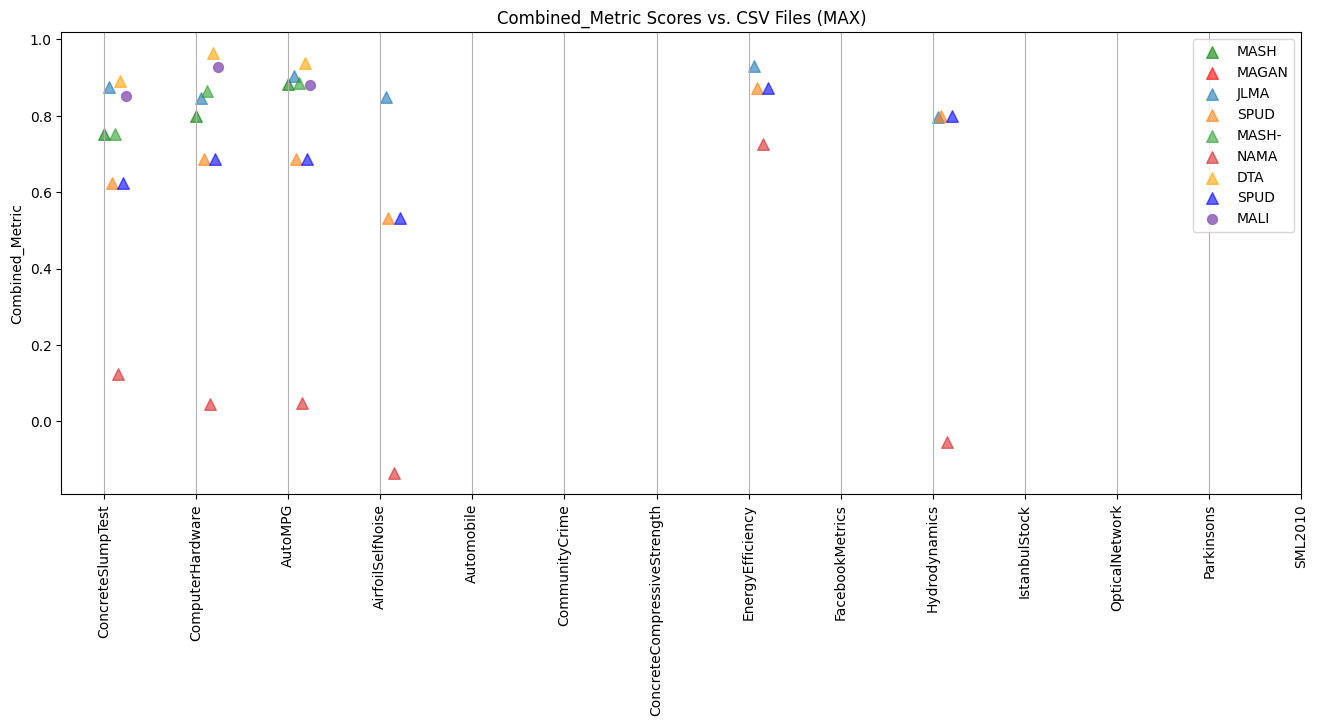

In [8]:
plt_methods_by_CSV_max(df = proc_reg_df, plot_methods=["MASH", "NAMA", "MALI", "SPUD", "MASH-", "BL_A-B", "BL_B-A", "MAGAN", "JLMA", "DTA"])

In [9]:
proc_reg_df["method"].nunique()

14

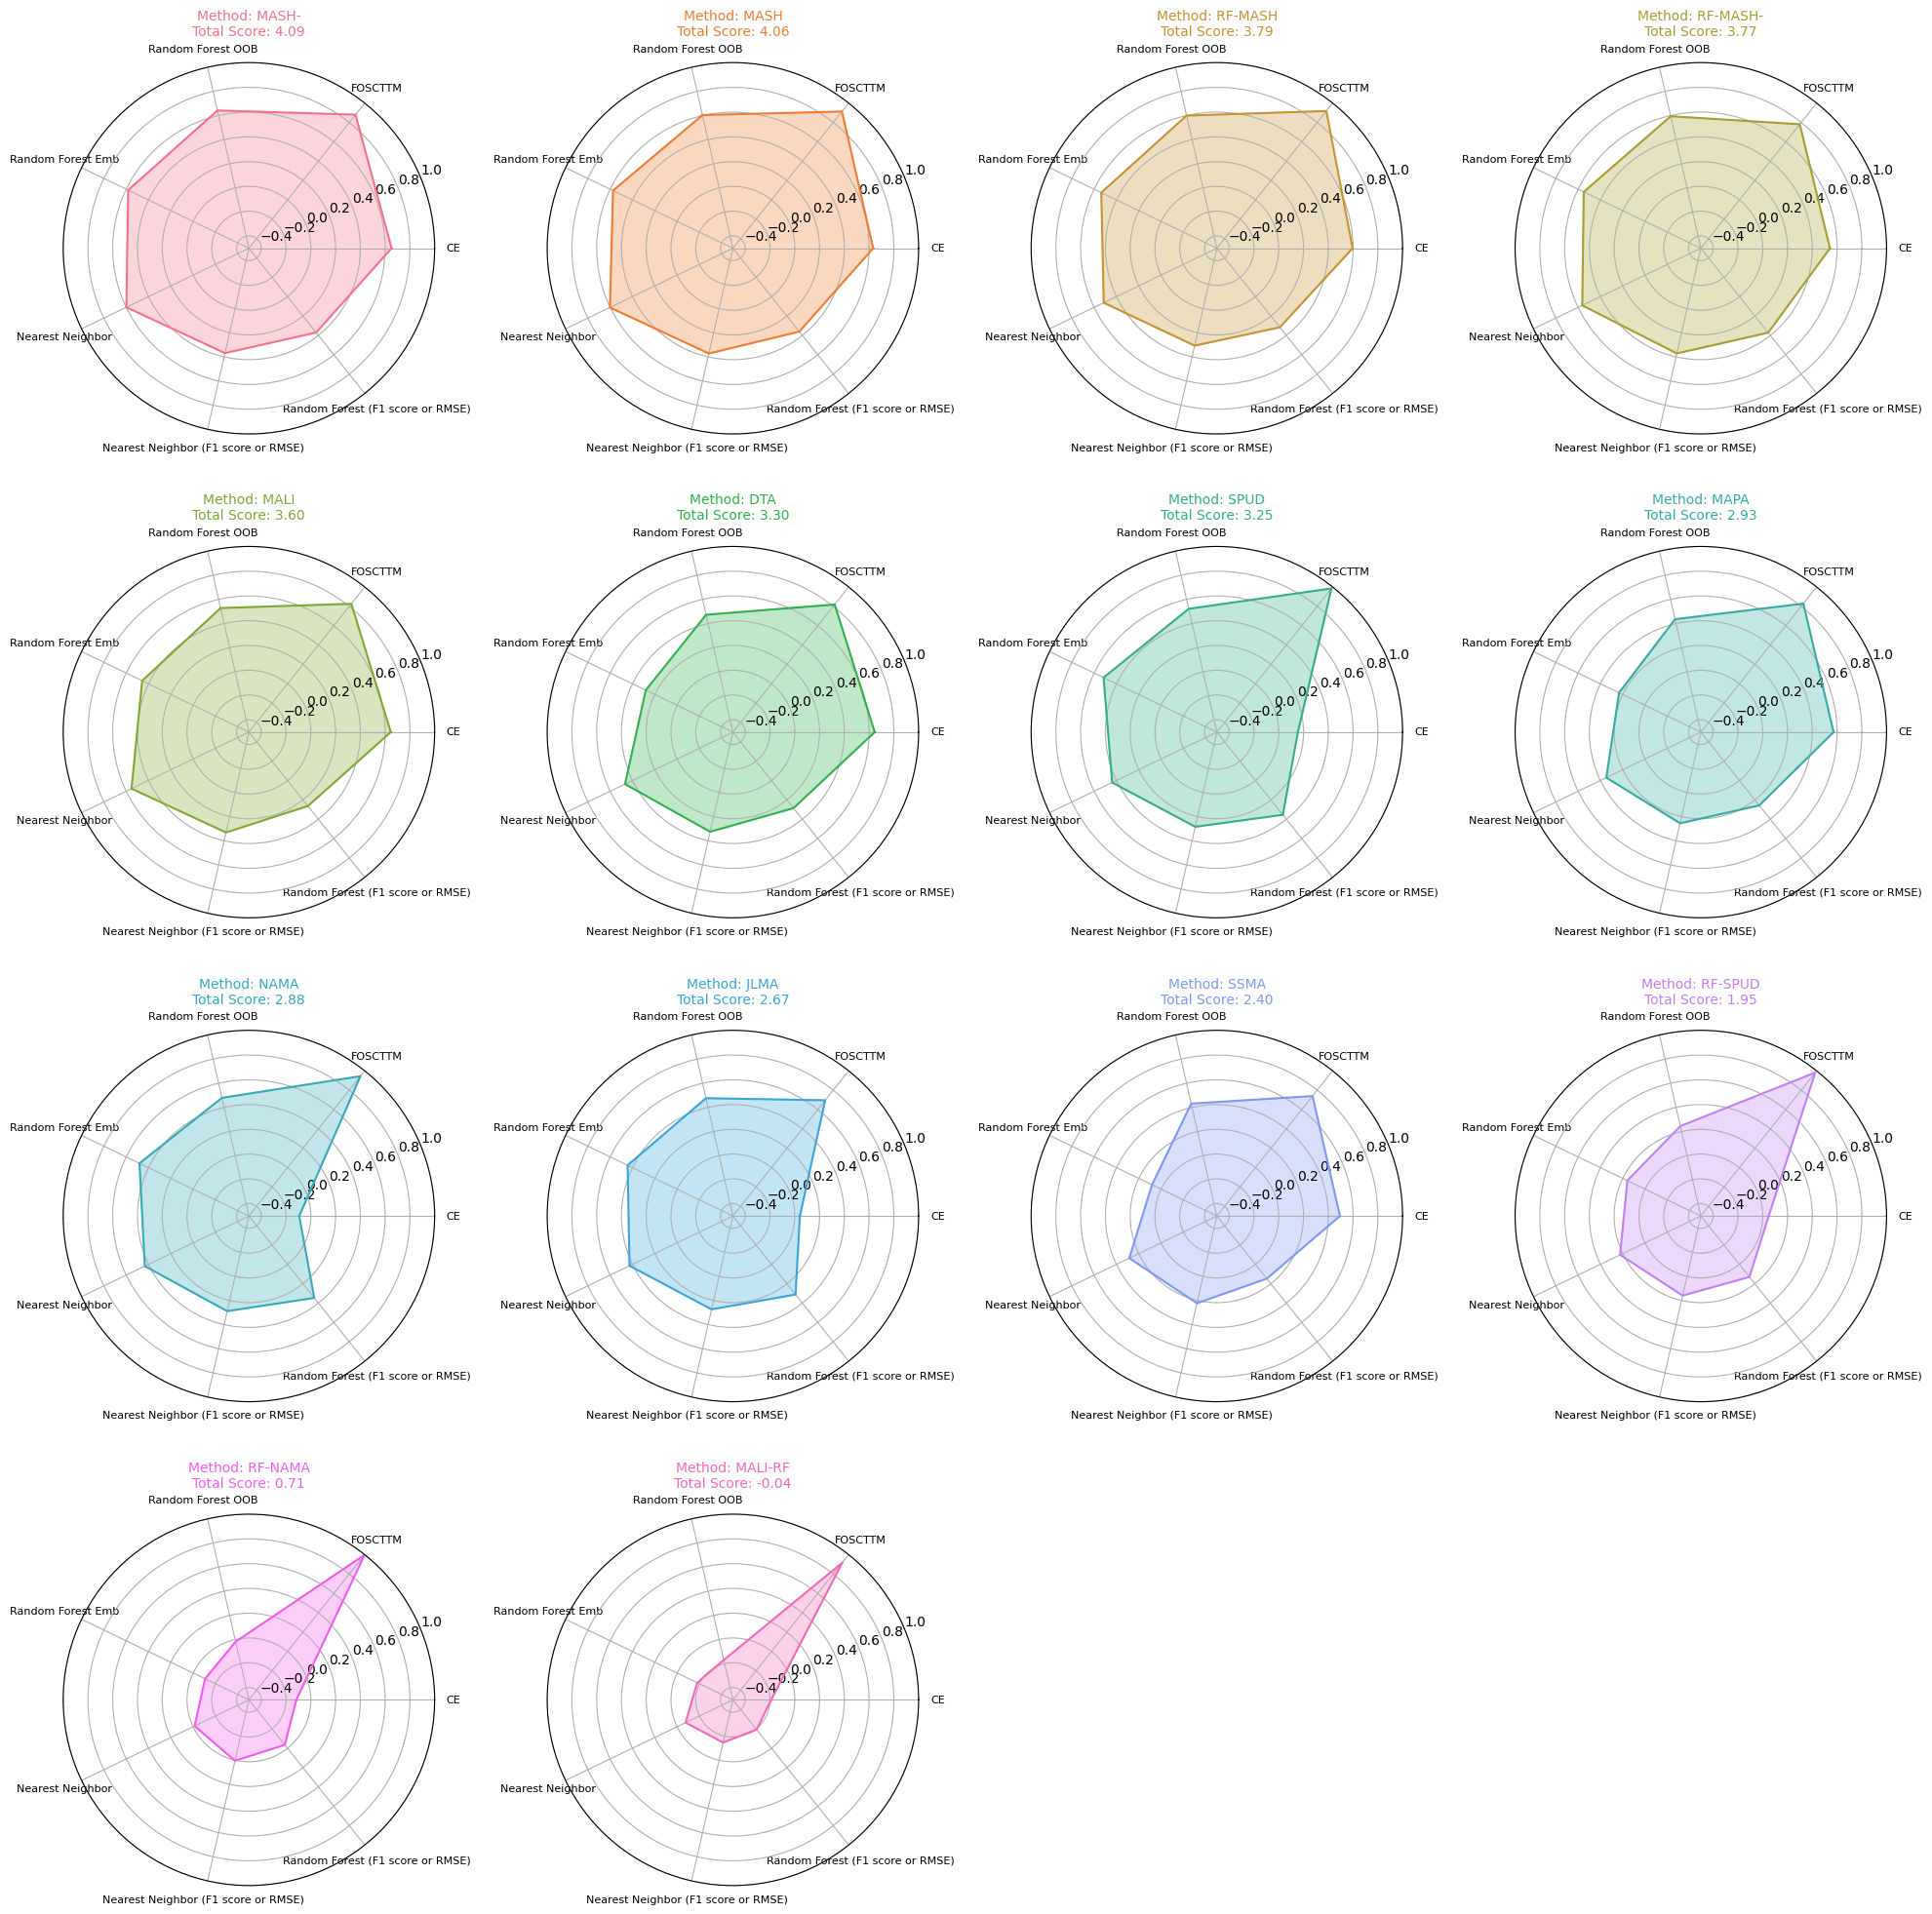

In [10]:
plot_radial(proc_reg_df, ['CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
                          'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)'])

## Veiw GRAE

In [11]:
proc_reg_df.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Combined_Metric,A_Classification_Score,B_Classification_Score
347,JLMA,ConcreteSlumpTest,skewed,0.3,-0.152972,0.447686,0.169953,0.183792,0.311543,0.752980,0.819871,"{'42': {'RF-OOB': 0.07490787319751868, 'KNN': ...",-0.600658,0.795020,0.940051
212,SPUD,AutoMPG,even,0.3,0.532809,0.000046,0.774841,0.652470,0.669554,0.526181,0.539611,"{'42': {'RF-OOB': 0.7257363275379061, 'KNN': 0...",0.532764,0.945549,0.895393


In [12]:
grae_expanded = pd.json_normalize(proc_reg_df['GRAE'])
# Rename columns by dropping the prefix before the dot
grae_expanded.columns = ["Grae-" + col.split(".", 1)[-1] for col in grae_expanded.columns]

# Calculate mean for each unique suffix
mean_scores = grae_expanded.groupby(grae_expanded.columns, axis=1).mean()
mean_scores.sample(2)


,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
181,-0.012727,1.001938,-0.024034,-0.100650,1.007519
335,0.007971,0.898486,-0.007400,-0.064537,0.904959


In [13]:
full_data = proc_reg_df.drop(columns = ["GRAE"]).join(mean_scores, on = None)
full_data.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,A_Classification_Score,B_Classification_Score,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
269,SPUD,AutoMPG,distort,0.3,0.162672,0.000039,0.820818,0.833626,0.779198,0.457343,0.396294,0.162633,0.956483,0.950881,0.756694,0.451391,0.782985,0.822009,0.425648
310,RF-SPUD,ConcreteSlumpTest,distort,0.3,-0.026521,0.000226,0.421764,0.343869,0.353926,0.759171,0.765588,-0.026747,0.915846,0.898092,0.604681,0.565736,0.560329,0.447001,0.601046


In [14]:
full_data.columns

Index(['method', 'csv_file', 'split', 'Percent_of_Anchors', 'CE', 'FOSCTTM',
       'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
       'Nearest Neighbor (F1 score or RMSE)',
       'Random Forest (F1 score or RMSE)', 'Combined_Metric',
       'A_Classification_Score', 'B_Classification_Score', 'Grae-KNN',
       'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'],
      dtype='object')

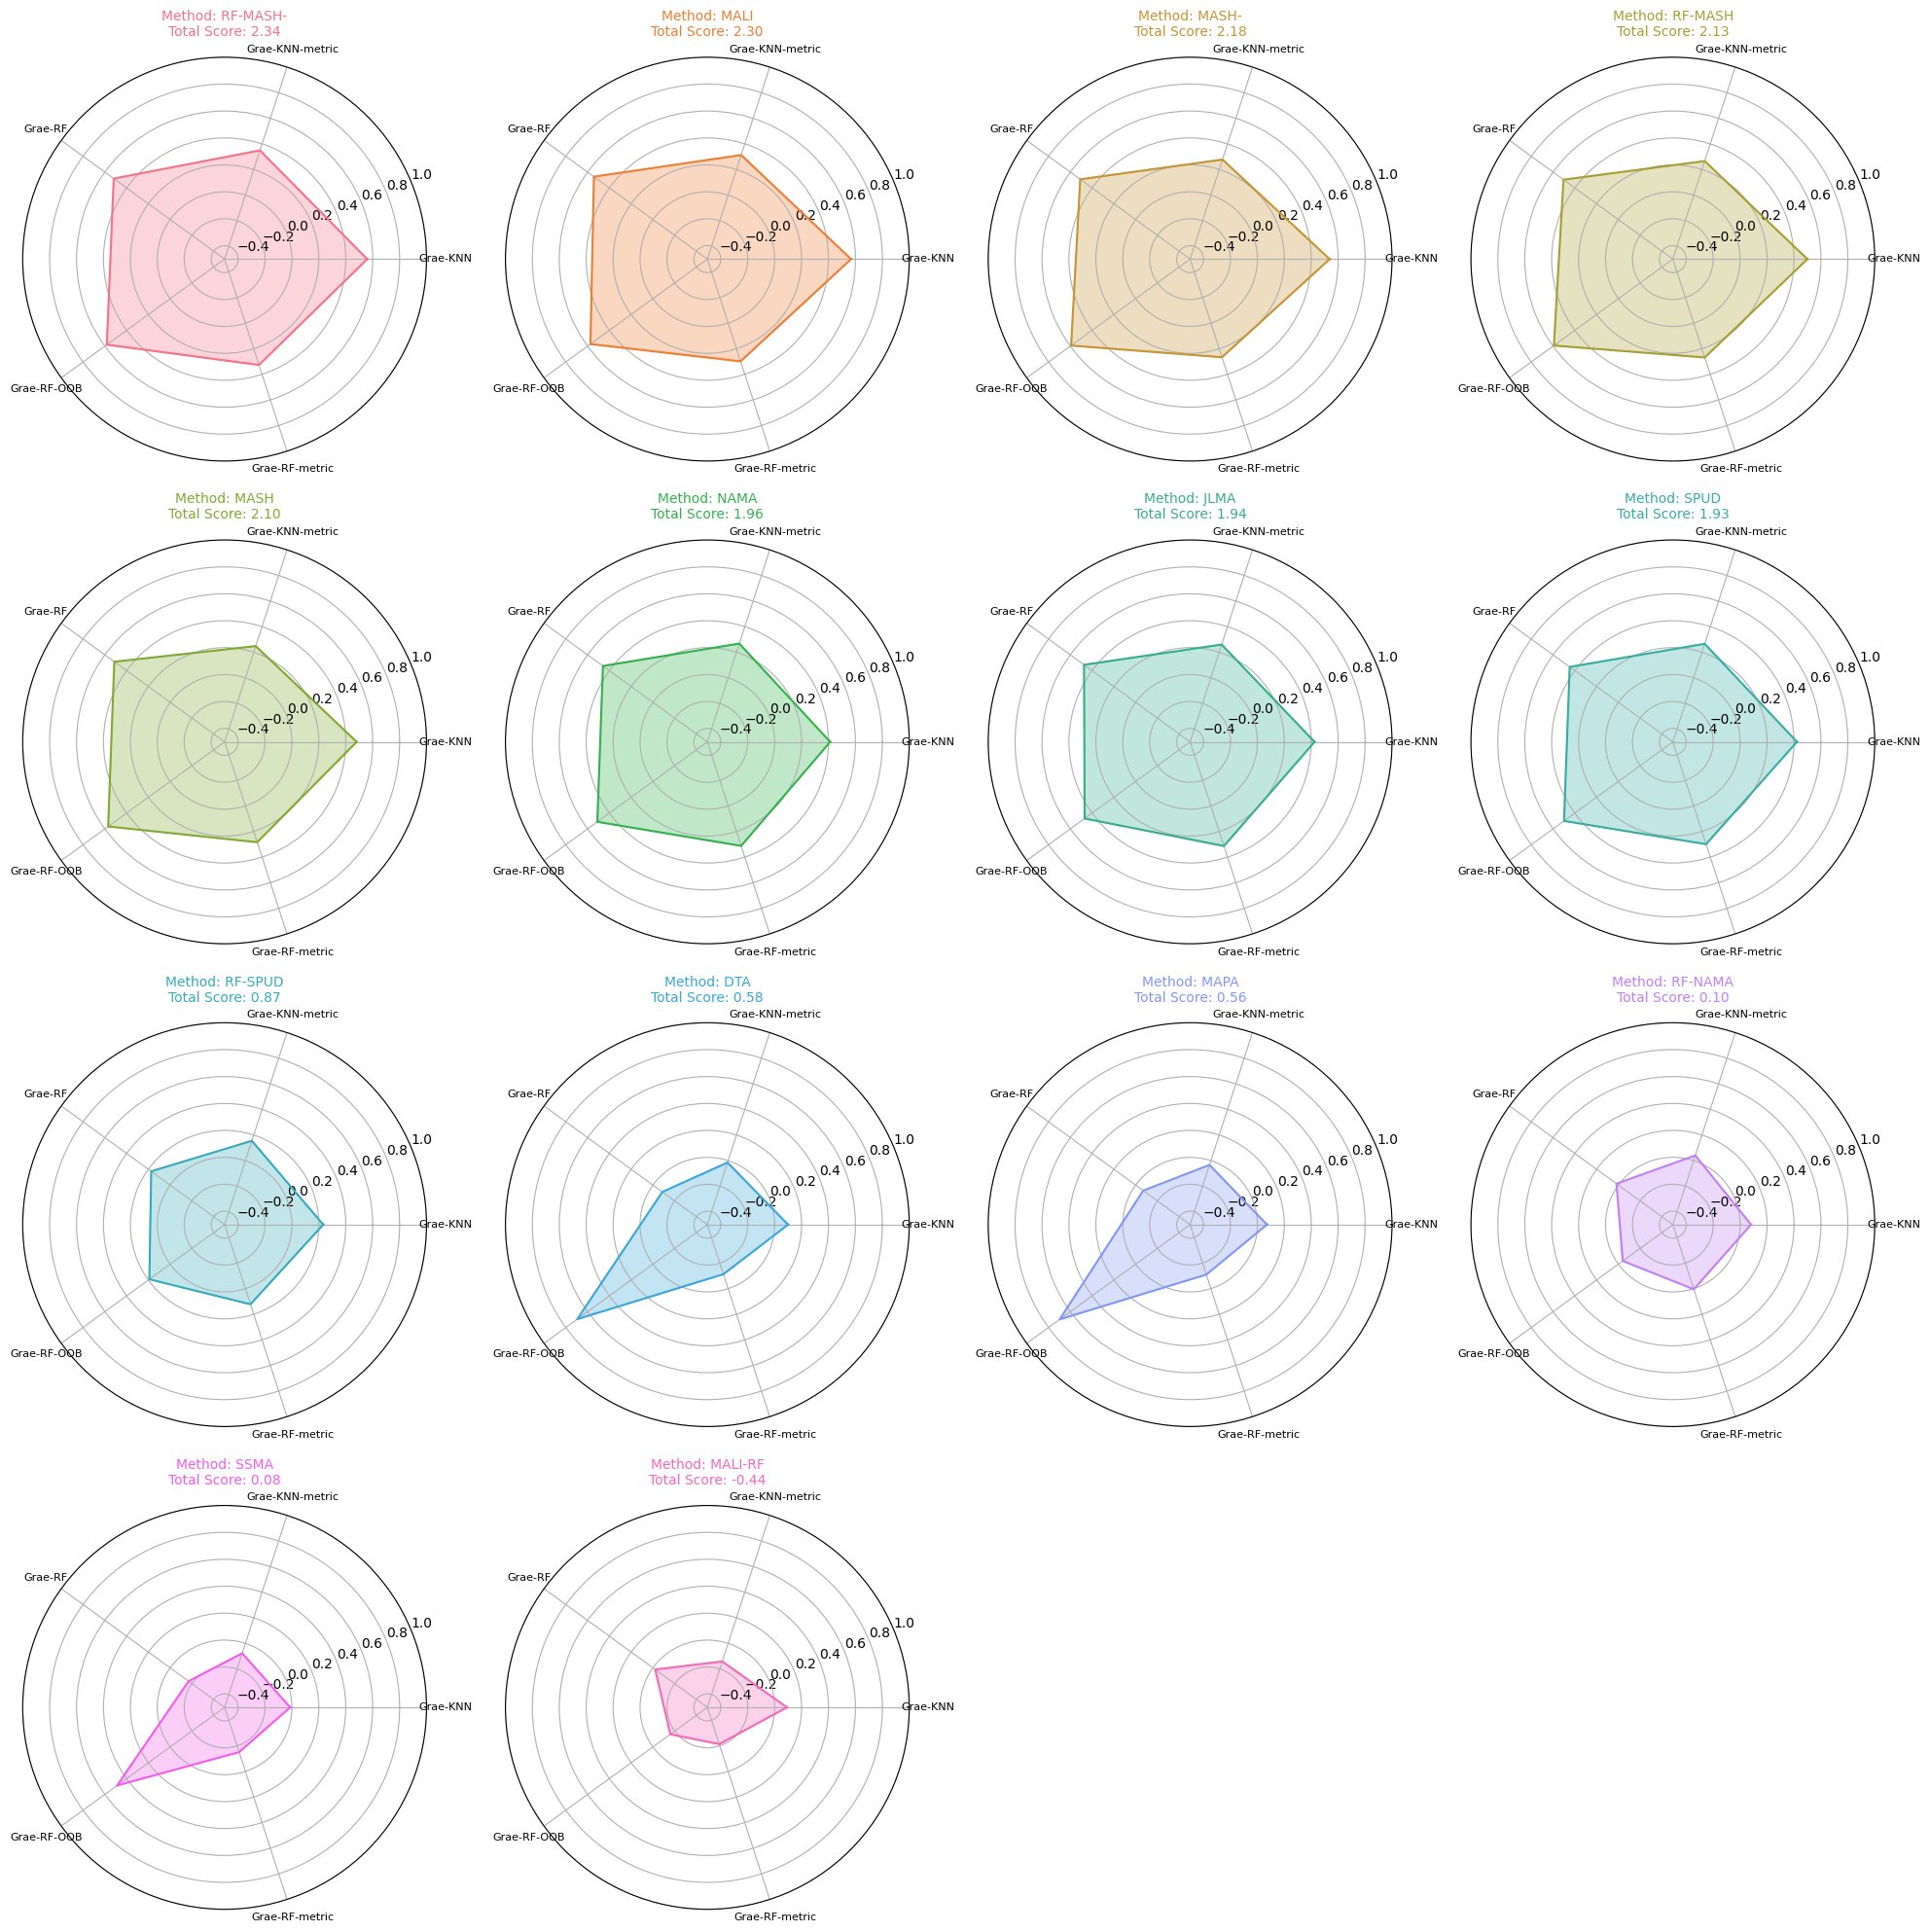

In [15]:
plot_radial(full_data, [#'CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
                          #'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)',
                          'Grae-KNN', 'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'])

# Compare Grae to RF Extend

In [16]:
full_data.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,A_Classification_Score,B_Classification_Score,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
352,MASH,ConcreteSlumpTest,turn,0.3,0.751774,0.000000,0.720877,0.674240,0.584226,0.594988,0.538336,0.751774,0.915846,0.915846,0.647940,0.538460,0.806209,0.681261,0.399496
111,JLMA,Hydrodynamics,even,0.3,-0.210836,0.322367,-0.081858,-0.286727,-0.057693,0.826908,0.912054,-0.533203,0.000619,0.988501,-0.166307,0.868328,-0.425668,-0.090158,0.960034


In [17]:
help(full_data.groupby)

Help on method groupby in module pandas.core.frame:

groupby(by=None, axis: 'Axis' = 0, level: 'IndexLabel | None' = None, as_index: 'bool' = True, sort: 'bool' = True, group_keys: 'bool' = True, observed: 'bool' = False, dropna: 'bool' = True) -> 'DataFrameGroupBy' method of pandas.core.frame.DataFrame instance
    Group DataFrame using a mapper or by a Series of columns.
    
    A groupby operation involves some combination of splitting the
    object, applying a function, and combining the results. This can be
    used to group large amounts of data and compute operations on these
    groups.
    
    Parameters
    ----------
    by : mapping, function, label, pd.Grouper or list of such
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the groups (the Series' values are first
        aligned; see ``

In [18]:
group_df = full_data.drop(columns = ["csv_file", "split", "Percent_of_Anchors", "A_Classification_Score", "B_Classification_Score"]).groupby(by = "method").mean()
group_df#.plot( )

,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
method,,,,,,,,,,,,,
DTA,0.645518,0.181316,0.472696,0.280642,0.466978,0.674523,0.714640,0.464202,0.099873,1.014944,-0.086730,0.694903,1.112739
JLMA,0.041190,0.304507,0.476223,0.443933,0.426424,0.726261,0.688573,-0.263317,0.424785,0.739875,0.473985,0.468533,0.686447
MALI,0.646056,0.173907,0.528043,0.456784,0.552087,0.668659,0.736376,0.472148,0.567933,0.686843,0.541722,0.573751,0.701477
MALI-RF,-0.190996,0.082293,-0.169525,-0.180162,-0.076165,1.146319,1.192544,-0.273289,0.091789,1.141222,-0.021222,-0.159909,1.212925
MAPA,0.571976,0.171905,0.435497,0.232873,0.346979,0.744726,0.742941,0.400072,0.071055,1.033528,-0.069687,0.697972,1.109572
MASH,0.633230,0.087049,0.603532,0.574359,0.602317,0.627976,0.639006,0.546181,0.481325,0.751863,0.512995,0.569320,0.716268
MASH-,0.652126,0.119684,0.641727,0.582237,0.598475,0.631354,0.629103,0.532443,0.536939,0.722255,0.508900,0.592497,0.733403
NAMA,-0.093469,0.055835,0.479021,0.480654,0.433126,0.711504,0.653560,-0.149304,0.412559,0.732314,0.458943,0.510325,0.687465
RF-MASH,0.596402,0.081954,0.599381,0.535911,0.514055,0.693037,0.683515,0.514448,0.499674,0.733867,0.503931,0.592400,0.731645


In [19]:
group_df.columns

Index(['CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb',
       'Nearest Neighbor', 'Nearest Neighbor (F1 score or RMSE)',
       'Random Forest (F1 score or RMSE)', 'Combined_Metric', 'Grae-KNN',
       'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'],
      dtype='object')

In [20]:
rf_extend = group_df[['Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor', 'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)']]  
grae = group_df[['Grae-KNN', 'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric']]

In [21]:
rf_extend.values - grae.values

array([[ 0.37282266, -0.73430202,  0.55370783, -0.02037923, -0.39809872],
       [ 0.05143868, -0.29594178, -0.04756021,  0.25772885,  0.0021263 ],
       [-0.03988989, -0.23005881,  0.01036556,  0.09490789,  0.03489881],
       [-0.2613147 , -1.32138401, -0.05494305,  1.30622862, -0.02038118],
       [ 0.36444181, -0.80065465,  0.41666656,  0.04675455, -0.36663108],
       [ 0.122207  , -0.17750434,  0.08932212,  0.05865609, -0.07726254],
       [ 0.10478838, -0.14001792,  0.08957418,  0.03885671, -0.10429962],
       [ 0.06646181, -0.25166023, -0.02581642,  0.20117923, -0.03390445],
       [ 0.09970662, -0.19795572,  0.01012447,  0.10063689, -0.04813067],
       [ 0.03414939, -0.10102231,  0.04503741,  0.04680227, -0.045563  ],
       [-0.09883616, -1.06636185, -0.03093018,  1.03573425,  0.03987935],
       [ 0.0120841 , -0.68667566,  0.04953475,  0.64956547, -0.00773371],
       [ 0.0997826 , -0.21833625, -0.00897365,  0.21641251, -0.05527448],
       [ 0.44366049, -0.9960069 ,  0.4

# Veiw Feature variance

In [22]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData")

#Average out the random seeds
reg_df["CE"] = [np.mean(list(d.values())) for d in reg_df["CE"].values]
reg_df["FOSCTTM"] = [np.mean(list(d.values())) for d in reg_df["FOSCTTM"].values]
reg_df["Combined_Metric"] = reg_df["CE"] - reg_df["FOSCTTM"]
reg_df.sample(2)

,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD,Combined_Metric
16,MASH-,ComputerHardware,random,0.3,"{'knn': 42, 'page_rank': 'None', 'DTM': 'kl', ...",0.482334,0.206481,"{'42': 0.5394195861003726, '1738': 0.605658032...","{'42': 0.592002361210421, '1738': -1.525990040...","{'42': 0.41631183451283627, '1738': -0.5550476...","{'42': 1.07178957466278, '1738': 0.76140037711...","{'42': 0.8960823212217349, '1738': 0.970414011...","{'42': {'RF-OOB': 0.24231822900333766, 'KNN': ...","{'knn': 0.09158409615235019, 'page_rank': 0.00...",0.275853
349,MALI,ConcreteSlumpTest,skewed,0.3,"{'knn': 2, 'mu': 0.1, 't': 3, 'transition_only...",0.449302,0.295315,{'42': 0.2730149353789756},{'42': 0.5339892082835969},{'42': 0.6252747277884534},{'42': 0.555522591793183},{'42': 0.6195027242439153},"{'42': {'RF-OOB': 0.31362224903783764, 'KNN': ...",{},0.153987


### Spud Parameters on STD

In [23]:
spud_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "SPUD"]["Parameter STD"].values))
spud_param_df

,knn,OD_method,agg_method
0,0.250736,0.081329,0.080068
1,0.315320,0.136722,0.112391
2,0.299406,0.038904,0.179496
3,0.257184,0.017215,0.020762
4,0.251965,0.055214,0.303049
...,...,...,...
85,0.256076,0.155706,0.088486
86,0.211884,0.053199,0.100037
87,0.589315,0.178530,0.034385
88,0.222530,0.223938,0.006242


<Axes: >

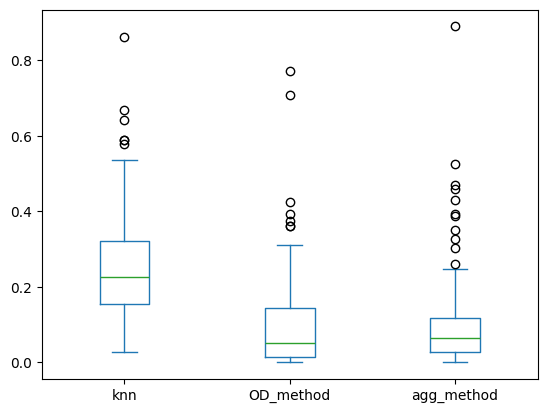

In [24]:
spud_param_df.plot(kind = "box") #This is showing how the std fluctuates between datasets

## MASH Parameters on STD

In [25]:
mash_minus_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "MASH-"]["Parameter STD"].values))
mash_minus_param_df

,knn,page_rank,DTM,density_normalization
0,0.091584,0.001708,0.118539,0.0
1,0.047939,0.000906,0.099663,0.0
2,0.069734,0.016474,0.230985,0.0
3,0.092473,0.003581,0.015512,0.0
4,0.051415,0.001235,0.003057,0.0
5,0.072225,0.006911,0.043598,0.0
6,0.036809,0.008237,0.027789,0.0
7,0.030963,0.014485,0.026845,0.0
8,0.048342,0.011424,0.023035,0.0
9,0.065621,0.002539,0.099485,0.0


<Axes: >

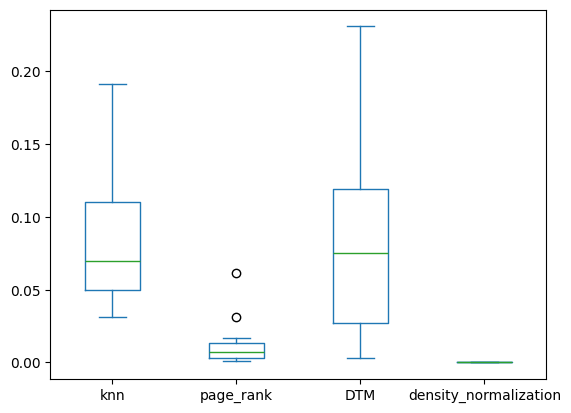

In [26]:
mash_minus_param_df.plot(kind = "box") #This is showing how the std fluctuates between datasets

In [27]:
mash_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "MASH"]["Parameter STD"].values))
mash_param_df

,connection_limit,threshold,epochs
0,0.000000,0.000000,0.000000e+00
1,0.000000,0.000000,0.000000e+00
2,0.000000,0.000000,0.000000e+00
3,0.000000,0.000000,0.000000e+00
4,0.034208,0.022954,1.110223e-16
5,0.000000,0.000000,1.110223e-16
6,0.000000,0.003440,1.110223e-16
7,0.000000,0.000000,0.000000e+00
8,0.000000,0.001427,0.000000e+00
9,0.000000,0.000000,0.000000e+00


<Axes: >

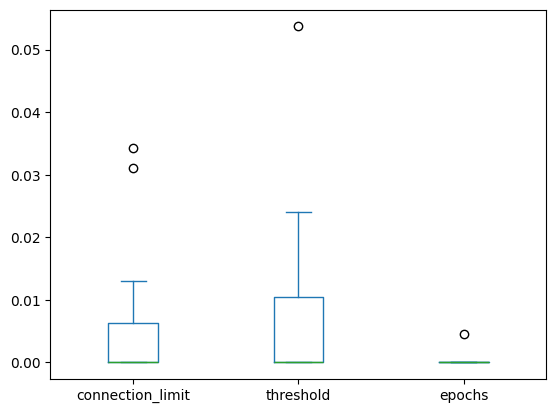

In [28]:
mash_param_df.plot(kind = "box") 